In [2]:
!mamba install -qy openpyxl

'mamba' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import requests
import json



In [5]:
data = pd.read_csv('D:\data science\project\Cuisine_rating.csv')
data.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [7]:
data.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
data.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

In [9]:
data["Cuisines"].value_counts()

Japanese    36
Filipino    34
French      34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: Cuisines, dtype: int64

In [10]:
#finding correlations
cuisine_num = data.select_dtypes(include=['float64', 'int64'])
cuisine_num_corr = cuisine_num.corr()['Service Rating'][:-1]
top_features = cuisine_num_corr[abs(cuisine_num_corr) > 0.1].sort_values(ascending=False) 
print("There is {} strongly correlated values with FoodRating:\n{}".format(len(top_features), top_features))

There is 3 strongly correlated values with FoodRating:
Service Rating    1.000000
User ID           0.111227
Budget           -0.135542
Name: Service Rating, dtype: float64


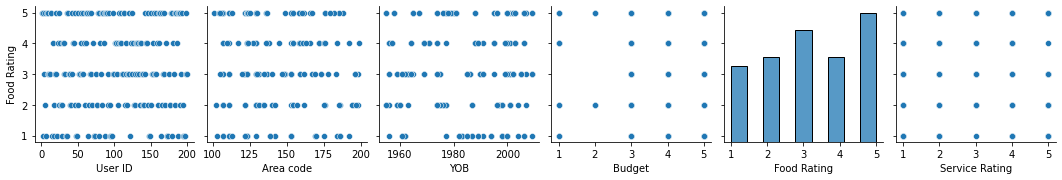

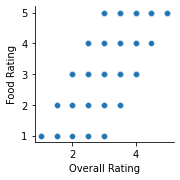

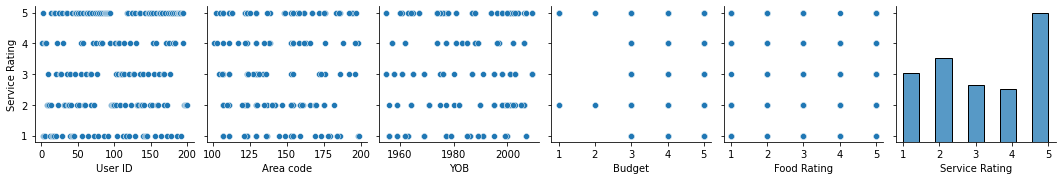

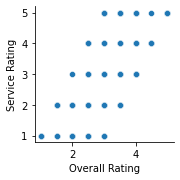

In [11]:
for i in range(0, len(cuisine_num.columns), 6):
    sns.pairplot(data=cuisine_num,
                x_vars=cuisine_num.columns[i:i+6],
                y_vars=['Food Rating'])
for i in range(0, len(cuisine_num.columns), 6):
    sns.pairplot(data=cuisine_num,
                x_vars=cuisine_num.columns[i:i+6],
                y_vars=['Service Rating'])

There is no correlation between the numerical features. 

Here we will start handling the duplicates as there is no missing data in this dataset

In [12]:
duplicate_data = data.duplicated(['User ID'])
duplicate_data

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [13]:
dup_removed = data.drop_duplicates()
dup_removed 

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


Log Transformation:

Skewness: -0.158389


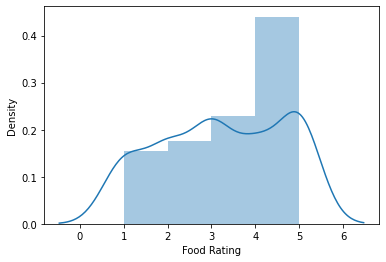

In [14]:
sp_untransformed = sns.distplot(data['Food Rating'])
print("Skewness: %f" % data['Food Rating'].skew())

Skewness: -0.800199


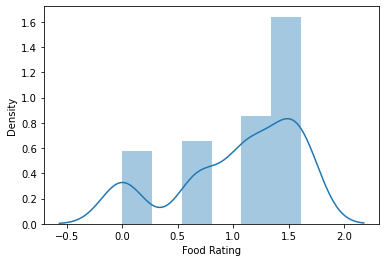

In [15]:
log_transformed = np.log(data['Food Rating'])
sp_transformed = sns.distplot(log_transformed)
print("Skewness: %f" % (log_transformed).skew())

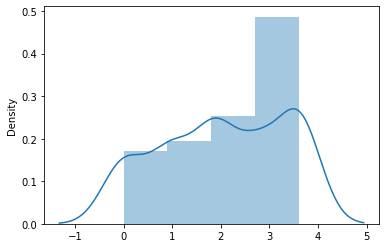

In [16]:
fitted_data, fitted_lambda = stats.boxcox(data['Food Rating'])
box_transformed = sns.distplot(fitted_data)


feature scaling:

In [17]:
scaled_data = StandardScaler().fit_transform(cuisine_num)
scaled_data

array([[-1.7234121 ,  0.45808819,  1.26257937, ...,  1.26448012,
         0.50584602,  1.18412682],
       [-1.70609137, -0.69288717,  0.36797897, ..., -1.57704824,
        -1.46498263, -2.0664174 ],
       [-1.68877065, -0.73125301, -0.46698141, ...,  1.26448012,
         1.1627889 ,  1.64849028],
       ...,
       [ 1.68877065,  0.72664911,  1.26257937, ...,  1.26448012,
        -0.80803974,  0.2553999 ],
       [ 1.70609137, -0.42432625,  1.02401926, ..., -0.15628406,
        -0.80803974, -0.67332702],
       [ 1.7234121 , -0.0406678 ,  1.20293934, ..., -0.15628406,
        -0.80803974, -0.67332702]])

Data Wrangling:

In [18]:
data_new =  data.rename(columns={"Location": "Address", "Activity": "Profession","Budget":"Money Spent","YOB" : "Year OF Birth",  "Often A S": "regular visitor"})
                   

In [19]:
data_new.head()

,User ID,Area code,Address,Gender,Year OF Birth,Marital Status,Profession,Money Spent,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,regular visitor
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [20]:
data_new[['City', 'State']] = data_new['Address'].str.split(',', n=1, expand=True)
data_new.head()

,User ID,Area code,Address,Gender,Year OF Birth,Marital Status,Profession,Money Spent,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,regular visitor,City,State
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,Upper East Side,NY
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,St. George,NY
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,Upper West Side,NY
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,Upper East Side,NY
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,Central Park,NY


In [21]:
data_new.drop(['Address'], axis = 1)

,User ID,Area code,Gender,Year OF Birth,Marital Status,Profession,Money Spent,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,regular visitor,City,State
0,1,153,Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,Upper East Side,NY
1,2,123,Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,St. George,NY
2,3,122,Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,Upper West Side,NY
3,4,153,Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,Upper East Side,NY
4,5,129,Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,Central Park,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No,St. George,NY
196,197,170,Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,Upper West Side,NY
197,198,160,Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,St. George,NY
198,199,130,Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,St. George,NY


In [22]:
data_new.Cuisines.unique().tolist()

['Japanese', 'Indian', 'Seafood', 'Filipino', 'Italian', 'Chinese', 'French']

In [23]:
rating_each_cuisine = data_new.groupby(['Cuisines'])['Overall Rating'].mean().round(2)
rating_each_cuisine

Cuisines
Chinese     3.27
Filipino    3.04
French      3.10
Indian      3.17
Italian     3.19
Japanese    3.60
Seafood     3.14
Name: Overall Rating, dtype: float64

In [24]:
#visualizating data for each cuisine
fig = px.line(data_new
                   ,x='Cuisines', y = "Overall Rating", 
                   color = "Overall Rating", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Rating for each Cuisine",
    xaxis_title="Rating",
    yaxis_title="Cuisines")
fig.show()

Starting Feature engineering as Categorical data should be converted to numerical ones for our ML models 

In [25]:
data1 = pd.get_dummies(data=data_new, columns = ['Cuisines'])

In [26]:
data1.head(10)

,User ID,Area code,Address,Gender,Year OF Birth,Marital Status,Profession,Money Spent,Alcohol,Smoker,...,regular visitor,City,State,Cuisines_Chinese,Cuisines_Filipino,Cuisines_French,Cuisines_Indian,Cuisines_Italian,Cuisines_Japanese,Cuisines_Seafood
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Never,Never,...,No,Upper East Side,NY,0,0,0,0,0,1,0
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Never,Socially,...,No,St. George,NY,0,0,0,1,0,0,0
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Often,Often,...,Yes,Upper West Side,NY,0,0,0,0,0,0,1
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Never,Socially,...,No,Upper East Side,NY,0,0,0,0,0,1,0
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Socially,Never,...,No,Central Park,NY,0,1,0,0,0,0,0
5,6,111,"China Town, NY",Male,1995,Single,Student,5,Never,Never,...,No,China Town,NY,0,0,0,0,0,0,1
6,7,111,"China Town, NY",Female,1977,Married,Professional,5,Often,Socially,...,No,China Town,NY,0,0,0,1,0,0,0
7,8,153,"Upper East Side,NY",Female,2003,Single,Professional,3,Often,Often,...,Yes,Upper East Side,NY,0,1,0,0,0,0,0
8,9,107,"Riverdale,NY",Male,1965,Single,Student,5,Socially,Socially,...,No,Riverdale,NY,0,0,0,0,1,0,0
9,10,129,"Central Park,NY",Male,1995,Single,Student,4,Often,Often,...,Yes,Central Park,NY,1,0,0,0,0,0,0


Hypothesis_testing:


H1:

<AxesSubplot:xlabel='Overall Rating', ylabel='Density'>

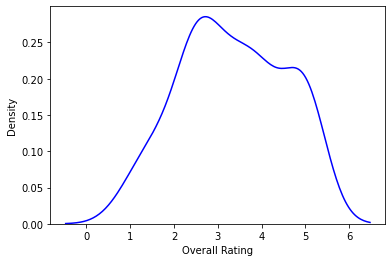

In [27]:
female = data1.loc[data1.Gender == 'Female']
male = data1.loc[data1.Gender == 'male']
f_rating = female['Overall Rating']
m_rating = male['Overall Rating']
sns.distplot(f_rating,color='blue',hist=False)
sns.distplot(m_rating,color='red',hist=False)

In [28]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(m_rating, f_rating)

In [29]:
if p_value1 < alpha:
    print("we have to reject the null hypothesis that female ratings is higher than male ratings.")
else:
    print("Fail to reject the null hypothesis asfemale ratings is less than or equal male ratings ")

Fail to reject the null hypothesis asfemale ratings is less than or equal male ratings 
